In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pnevmoniya/sample_solution.csv
/kaggle/input/pnevmoniya/test/test_img_10340.jpeg
/kaggle/input/pnevmoniya/test/test_img_10168.jpeg
/kaggle/input/pnevmoniya/test/test_img_10613.jpeg
/kaggle/input/pnevmoniya/test/test_img_10368.jpeg
/kaggle/input/pnevmoniya/test/test_img_10036.jpeg
/kaggle/input/pnevmoniya/test/test_img_10527.jpeg
/kaggle/input/pnevmoniya/test/test_img_10020.jpeg
/kaggle/input/pnevmoniya/test/test_img_10585.jpeg
/kaggle/input/pnevmoniya/test/test_img_10276.jpeg
/kaggle/input/pnevmoniya/test/test_img_10054.jpeg
/kaggle/input/pnevmoniya/test/test_img_10298.jpeg
/kaggle/input/pnevmoniya/test/test_img_10355.jpeg
/kaggle/input/pnevmoniya/test/test_img_10511.jpeg
/kaggle/input/pnevmoniya/test/test_img_10410.jpeg
/kaggle/input/pnevmoniya/test/test_img_10096.jpeg
/kaggle/input/pnevmoniya/test/test_img_10219.jpeg
/kaggle/input/pnevmoniya/test/test_img_10057.jpeg
/kaggle/input/pnevmoniya/test/test_img_10296.jpeg
/kaggle/input/pnevmoniya/test/test_img_10407.jpeg
/kagg

In [2]:
# kutubxonalarni yuklab olish
import torch
import fastai

# versiyalarini tekshirish
print(torch.__version__)
print(fastai.__version__)

1.13.0
2.7.11


In [3]:
from fastai.vision.all import *
from ipywidgets import widgets

#
path = Path('../input/pnevmoniya/train')
path.ls()

(#2) [Path('../input/pnevmoniya/train/PNEUMONIA'),Path('../input/pnevmoniya/train/NORMAL')]

In [4]:
fls = get_image_files(path)
failed = verify_images(path)
failed

zip argument #1 must support iteration


(#0) []

In [5]:
#Datablock yaratamiz

transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

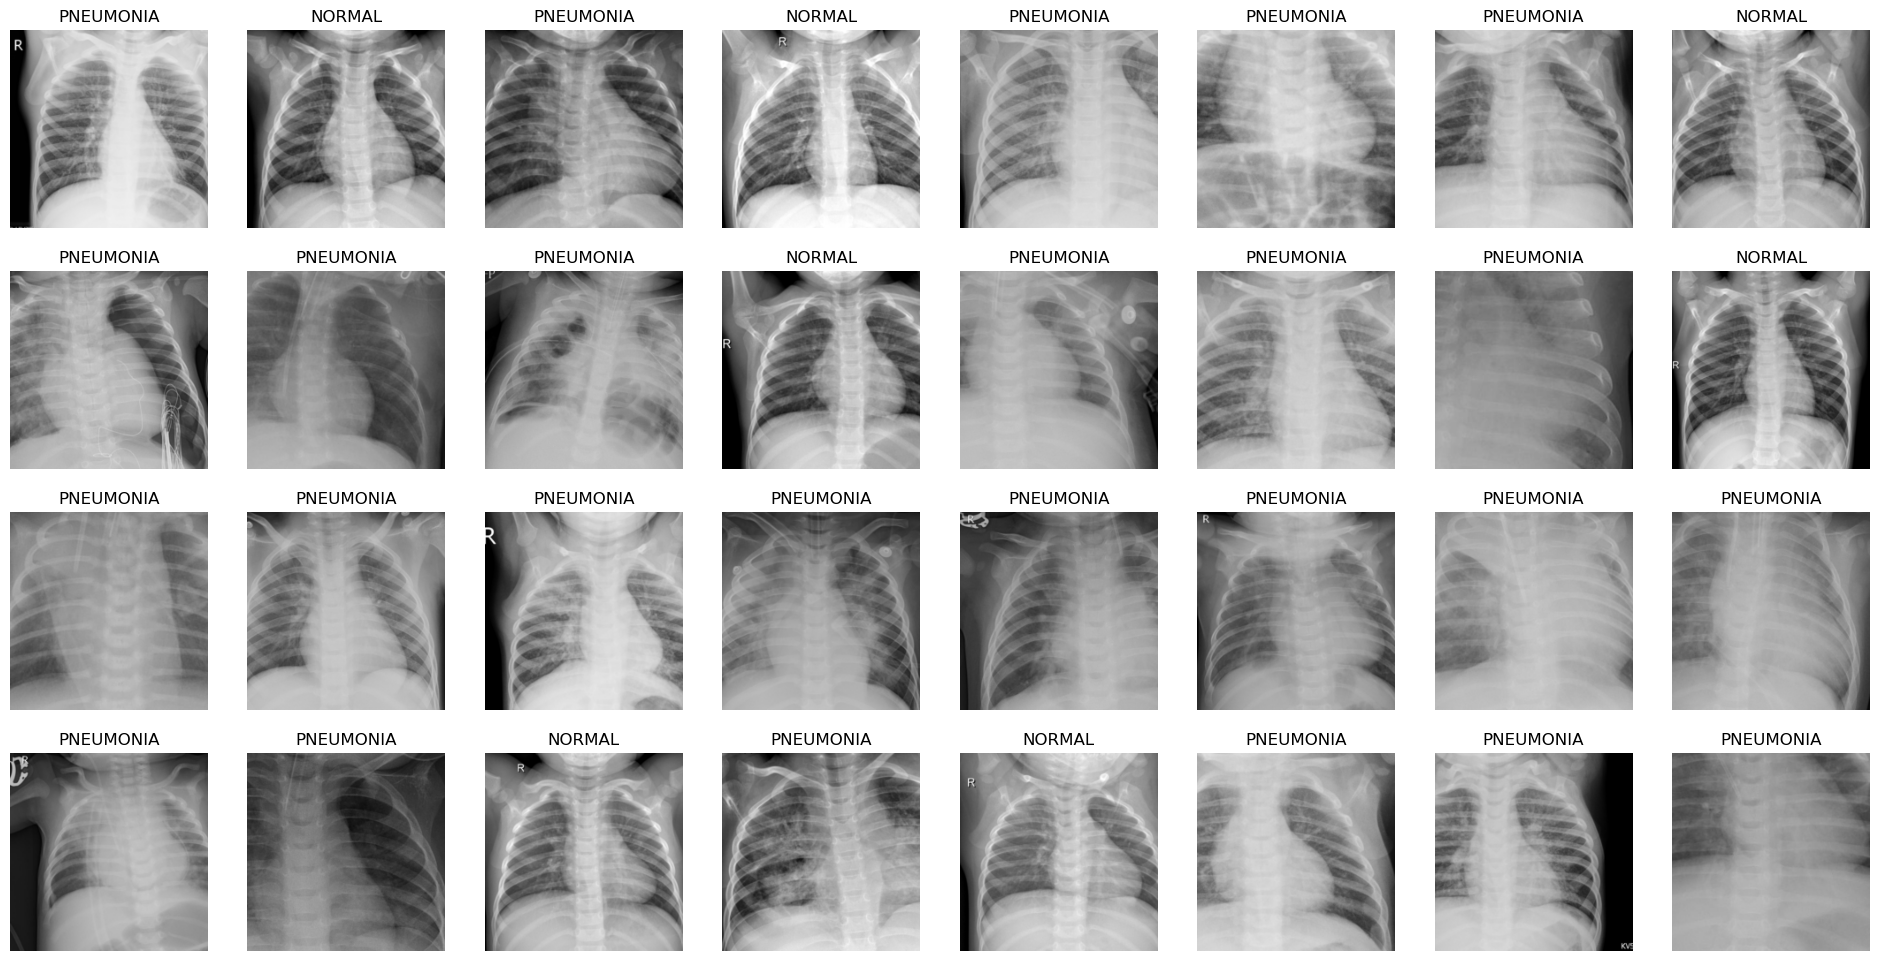

In [6]:

#Dataloader yaratamiz
dls = transports.dataloaders(path)

#datasetlarni tekshiramiz
dls.train.show_batch(max_n=32,nrows=4)

In [40]:
#train qilamiz
learn = cnn_learner(dls,resnet34, metrics=accuracy)
learn.fine_tune(4)

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.495830,0.186160,0.936721,02:41


epoch,train_loss,valid_loss,accuracy,time
0,0.170107,0.115419,0.962608,02:43
1,0.087929,0.066235,0.980825,02:41
2,0.062904,0.080587,0.976031,02:42
3,0.039286,0.069473,0.977948,02:47


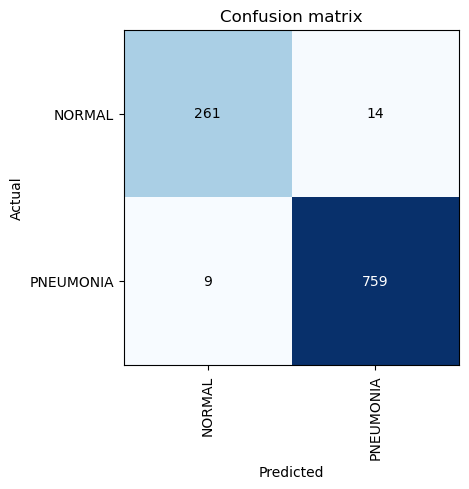

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

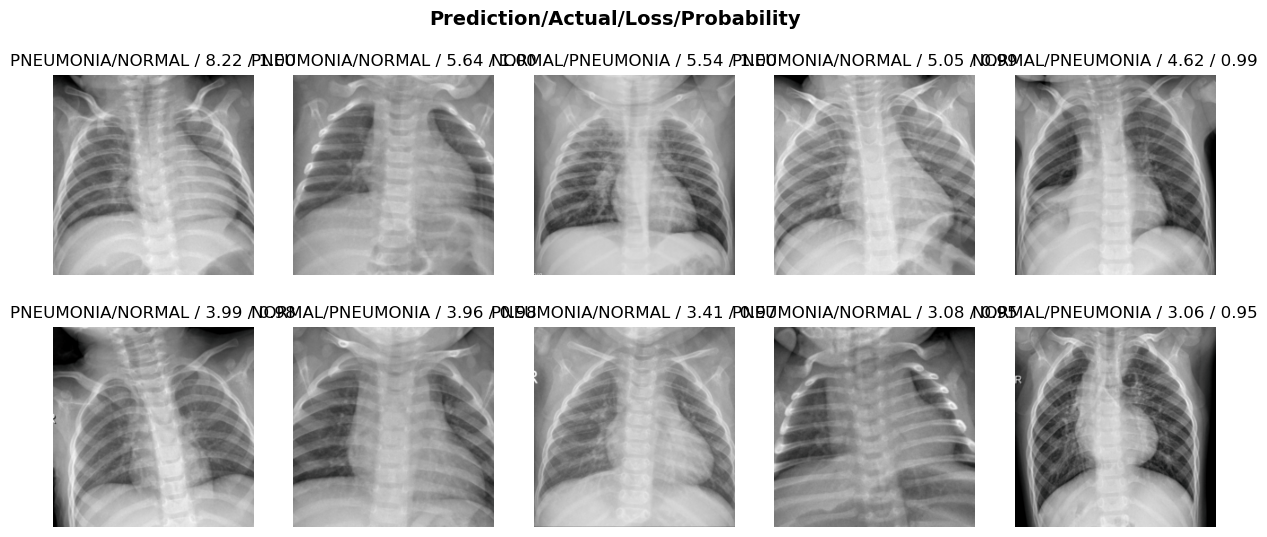

In [42]:
interp.plot_top_losses(10,nrows=2)

In [43]:
learn.export('Pnevmaniya.pkl')

In [44]:
test_path = Path('../input/pnevmoniya/test/')
test_path

Path('../input/pnevmoniya/test')

In [52]:
from tqdm import tqdm

In [53]:
files = !ls '../input/pnevmoniya/test/'
preds = []
numbers = []
for file in tqdm(files):
    number, n_th, probs = learn.predict(f"../input/pnevmoniya/test/{file}")
    preds.append(n_th)
    numbers.append(number)
# files

  0%|          | 0/624 [00:00<?, ?it/s]

  0%|          | 1/624 [00:00<01:29,  6.95it/s]

  0%|          | 2/624 [00:00<01:36,  6.45it/s]

  0%|          | 3/624 [00:00<01:26,  7.14it/s]

  1%|          | 4/624 [00:00<01:19,  7.81it/s]

  1%|          | 5/624 [00:00<01:34,  6.54it/s]

  1%|          | 7/624 [00:00<01:13,  8.39it/s]

  1%|▏         | 9/624 [00:01<01:04,  9.61it/s]

  2%|▏         | 11/624 [00:01<01:01, 10.00it/s]

  2%|▏         | 13/624 [00:01<00:54, 11.25it/s]

  2%|▏         | 15/624 [00:01<00:56, 10.77it/s]

  3%|▎         | 17/624 [00:01<00:51, 11.76it/s]

  3%|▎         | 19/624 [00:01<00:49, 12.29it/s]

  3%|▎         | 21/624 [00:02<01:00, 10.04it/s]

  4%|▎         | 23/624 [00:02<00:55, 10.81it/s]

  4%|▍         | 25/624 [00:02<00:55, 10.73it/s]

  4%|▍         | 27/624 [00:02<00:54, 11.02it/s]

  5%|▍         | 29/624 [00:02<00:52, 11.27it/s]

  5%|▍         | 31/624 [00:03<00:53, 11.17it/s]

  5%|▌         | 33/624 [00:03<00:49, 11.86it/s]

  6%|▌         | 35/624 [00:03<00:45, 13.04it/s]

  6%|▌         | 37/624 [00:03<00:44, 13.07it/s]

  6%|▋         | 39/624 [00:03<00:41, 13.98it/s]

  7%|▋         | 41/624 [00:03<00:41, 13.96it/s]

  7%|▋         | 43/624 [00:03<00:44, 13.01it/s]

  7%|▋         | 45/624 [00:04<00:44, 12.89it/s]

  8%|▊         | 47/624 [00:04<00:47, 12.18it/s]

  8%|▊         | 49/624 [00:04<00:46, 12.27it/s]

  8%|▊         | 51/624 [00:04<00:52, 10.97it/s]

  8%|▊         | 53/624 [00:04<00:54, 10.39it/s]

  9%|▉         | 55/624 [00:04<00:52, 10.85it/s]

  9%|▉         | 57/624 [00:05<00:48, 11.72it/s]

  9%|▉         | 59/624 [00:05<00:51, 10.88it/s]

 10%|▉         | 61/624 [00:05<00:53, 10.61it/s]

 10%|█         | 63/624 [00:05<00:50, 11.14it/s]

 10%|█         | 65/624 [00:05<00:49, 11.36it/s]

 11%|█         | 67/624 [00:06<00:49, 11.30it/s]

 11%|█         | 69/624 [00:06<00:54, 10.24it/s]

 11%|█▏        | 71/624 [00:06<00:52, 10.54it/s]

 12%|█▏        | 73/624 [00:06<00:50, 10.90it/s]

 12%|█▏        | 75/624 [00:06<00:49, 11.16it/s]

 12%|█▏        | 77/624 [00:06<00:48, 11.21it/s]

 13%|█▎        | 79/624 [00:07<00:45, 12.00it/s]

 13%|█▎        | 81/624 [00:07<00:43, 12.36it/s]

 13%|█▎        | 83/624 [00:07<00:46, 11.60it/s]

 14%|█▎        | 85/624 [00:07<00:44, 12.00it/s]

 14%|█▍        | 87/624 [00:07<00:42, 12.71it/s]

 14%|█▍        | 89/624 [00:07<00:41, 12.90it/s]

 15%|█▍        | 91/624 [00:08<00:42, 12.51it/s]

 15%|█▍        | 93/624 [00:08<00:40, 12.97it/s]

 15%|█▌        | 95/624 [00:08<00:44, 11.79it/s]

 16%|█▌        | 97/624 [00:08<00:50, 10.48it/s]

 16%|█▌        | 99/624 [00:08<00:49, 10.55it/s]

 16%|█▌        | 101/624 [00:09<00:46, 11.32it/s]

 17%|█▋        | 103/624 [00:09<00:44, 11.64it/s]

 17%|█▋        | 105/624 [00:09<00:44, 11.68it/s]

 17%|█▋        | 107/624 [00:09<00:52,  9.83it/s]

 17%|█▋        | 109/624 [00:09<00:56,  9.14it/s]

 18%|█▊        | 110/624 [00:09<00:57,  8.98it/s]

 18%|█▊        | 112/624 [00:10<00:54,  9.39it/s]

 18%|█▊        | 113/624 [00:10<00:56,  9.10it/s]

 18%|█▊        | 115/624 [00:10<00:50, 10.12it/s]

 19%|█▉        | 117/624 [00:10<00:42, 11.83it/s]

 19%|█▉        | 119/624 [00:10<00:43, 11.67it/s]

 19%|█▉        | 121/624 [00:11<00:50,  9.96it/s]

 20%|█▉        | 123/624 [00:11<00:50,  9.84it/s]

 20%|██        | 125/624 [00:11<00:53,  9.34it/s]

 20%|██        | 127/624 [00:11<00:50,  9.91it/s]

 21%|██        | 129/624 [00:11<00:47, 10.35it/s]

 21%|██        | 131/624 [00:11<00:45, 10.83it/s]

 21%|██▏       | 133/624 [00:12<00:41, 11.85it/s]

 22%|██▏       | 135/624 [00:12<00:42, 11.51it/s]

 22%|██▏       | 137/624 [00:12<00:45, 10.74it/s]

 22%|██▏       | 139/624 [00:12<00:44, 11.00it/s]

 23%|██▎       | 141/624 [00:12<00:40, 12.06it/s]

 23%|██▎       | 143/624 [00:12<00:39, 12.19it/s]

 23%|██▎       | 145/624 [00:13<00:35, 13.47it/s]

 24%|██▎       | 147/624 [00:13<00:35, 13.62it/s]

 24%|██▍       | 149/624 [00:13<00:34, 13.58it/s]

 24%|██▍       | 151/624 [00:13<00:36, 13.01it/s]

 25%|██▍       | 153/624 [00:13<00:35, 13.13it/s]

 25%|██▍       | 155/624 [00:13<00:35, 13.05it/s]

 25%|██▌       | 157/624 [00:14<00:36, 12.95it/s]

 25%|██▌       | 159/624 [00:14<00:36, 12.64it/s]

 26%|██▌       | 161/624 [00:14<00:39, 11.58it/s]

 26%|██▌       | 163/624 [00:14<00:40, 11.36it/s]

 26%|██▋       | 165/624 [00:14<00:40, 11.46it/s]

 27%|██▋       | 167/624 [00:14<00:43, 10.61it/s]

 27%|██▋       | 169/624 [00:15<00:40, 11.11it/s]

 27%|██▋       | 171/624 [00:15<00:38, 11.79it/s]

 28%|██▊       | 173/624 [00:15<00:37, 11.98it/s]

 28%|██▊       | 175/624 [00:15<00:39, 11.27it/s]

 28%|██▊       | 177/624 [00:15<00:40, 11.04it/s]

 29%|██▊       | 179/624 [00:15<00:40, 11.06it/s]

 29%|██▉       | 181/624 [00:16<00:37, 11.79it/s]

 29%|██▉       | 183/624 [00:16<00:37, 11.84it/s]

 30%|██▉       | 185/624 [00:16<00:38, 11.26it/s]

 30%|██▉       | 187/624 [00:16<00:37, 11.51it/s]

 30%|███       | 189/624 [00:16<00:36, 11.80it/s]

 31%|███       | 191/624 [00:16<00:35, 12.18it/s]

 31%|███       | 193/624 [00:17<00:43,  9.85it/s]

 31%|███▏      | 195/624 [00:17<00:43,  9.83it/s]

 32%|███▏      | 197/624 [00:17<00:41, 10.34it/s]

 32%|███▏      | 199/624 [00:17<00:39, 10.67it/s]

 32%|███▏      | 201/624 [00:17<00:38, 11.13it/s]

 33%|███▎      | 203/624 [00:18<00:35, 11.75it/s]

 33%|███▎      | 205/624 [00:18<00:35, 11.79it/s]

 33%|███▎      | 207/624 [00:18<00:35, 11.66it/s]

 33%|███▎      | 209/624 [00:18<00:34, 11.98it/s]

 34%|███▍      | 211/624 [00:18<00:38, 10.77it/s]

 34%|███▍      | 213/624 [00:19<00:41,  9.93it/s]

 34%|███▍      | 215/624 [00:19<00:46,  8.89it/s]

 35%|███▍      | 217/624 [00:19<00:42,  9.67it/s]

 35%|███▌      | 219/624 [00:19<00:40, 10.03it/s]

 35%|███▌      | 221/624 [00:19<00:44,  9.14it/s]

 36%|███▌      | 223/624 [00:20<00:39, 10.26it/s]

 36%|███▌      | 225/624 [00:20<00:37, 10.65it/s]

 36%|███▋      | 227/624 [00:20<00:37, 10.62it/s]

 37%|███▋      | 229/624 [00:20<00:35, 11.22it/s]

 37%|███▋      | 231/624 [00:20<00:39, 10.02it/s]

 37%|███▋      | 233/624 [00:21<00:38, 10.26it/s]

 38%|███▊      | 235/624 [00:21<00:34, 11.31it/s]

 38%|███▊      | 237/624 [00:21<00:38, 10.17it/s]

 38%|███▊      | 239/624 [00:21<00:38, 10.00it/s]

 39%|███▊      | 241/624 [00:21<00:37, 10.12it/s]

 39%|███▉      | 243/624 [00:22<00:38,  9.84it/s]

 39%|███▉      | 245/624 [00:22<00:40,  9.38it/s]

 39%|███▉      | 246/624 [00:22<00:42,  8.99it/s]

 40%|███▉      | 247/624 [00:22<00:45,  8.25it/s]

 40%|███▉      | 248/624 [00:22<00:47,  7.97it/s]

 40%|███▉      | 249/624 [00:23<01:09,  5.38it/s]

 40%|████      | 250/624 [00:23<01:05,  5.73it/s]

 40%|████      | 251/624 [00:23<00:59,  6.31it/s]

 40%|████      | 252/624 [00:23<00:55,  6.72it/s]

 41%|████      | 253/624 [00:23<00:53,  6.96it/s]

 41%|████      | 254/624 [00:23<00:49,  7.53it/s]

 41%|████      | 255/624 [00:23<00:49,  7.40it/s]

 41%|████      | 256/624 [00:23<00:48,  7.64it/s]

 41%|████▏     | 258/624 [00:24<00:44,  8.25it/s]

 42%|████▏     | 260/624 [00:24<00:35, 10.21it/s]

 42%|████▏     | 262/624 [00:24<00:31, 11.53it/s]

 42%|████▏     | 264/624 [00:24<00:28, 12.44it/s]

 43%|████▎     | 266/624 [00:24<00:33, 10.73it/s]

 43%|████▎     | 268/624 [00:25<00:33, 10.69it/s]

 43%|████▎     | 270/624 [00:25<00:31, 11.27it/s]

 44%|████▎     | 272/624 [00:25<00:28, 12.19it/s]

 44%|████▍     | 274/624 [00:25<00:28, 12.47it/s]

 44%|████▍     | 276/624 [00:25<00:28, 12.36it/s]

 45%|████▍     | 278/624 [00:25<00:35,  9.72it/s]

 45%|████▍     | 280/624 [00:26<00:33, 10.36it/s]

 45%|████▌     | 282/624 [00:26<00:35,  9.64it/s]

 46%|████▌     | 284/624 [00:26<00:31, 10.76it/s]

 46%|████▌     | 286/624 [00:26<00:34,  9.72it/s]

 46%|████▌     | 288/624 [00:26<00:31, 10.65it/s]

 46%|████▋     | 290/624 [00:27<00:35,  9.52it/s]

 47%|████▋     | 292/624 [00:27<00:32, 10.15it/s]

 47%|████▋     | 294/624 [00:27<00:34,  9.68it/s]

 47%|████▋     | 296/624 [00:27<00:32, 10.05it/s]

 48%|████▊     | 298/624 [00:27<00:30, 10.68it/s]

 48%|████▊     | 300/624 [00:28<00:28, 11.45it/s]

 48%|████▊     | 302/624 [00:28<00:31, 10.34it/s]

 49%|████▊     | 304/624 [00:28<00:29, 11.03it/s]

 49%|████▉     | 306/624 [00:28<00:31, 10.12it/s]

 49%|████▉     | 308/624 [00:28<00:30, 10.30it/s]

 50%|████▉     | 310/624 [00:29<00:30, 10.26it/s]

 50%|█████     | 312/624 [00:29<00:28, 10.94it/s]

 50%|█████     | 314/624 [00:29<00:26, 11.77it/s]

 51%|█████     | 316/624 [00:29<00:26, 11.59it/s]

 51%|█████     | 318/624 [00:29<00:24, 12.39it/s]

 51%|█████▏    | 320/624 [00:29<00:24, 12.44it/s]

 52%|█████▏    | 322/624 [00:29<00:22, 13.32it/s]

 52%|█████▏    | 324/624 [00:30<00:23, 13.00it/s]

 52%|█████▏    | 326/624 [00:30<00:23, 12.81it/s]

 53%|█████▎    | 328/624 [00:30<00:22, 13.11it/s]

 53%|█████▎    | 330/624 [00:30<00:21, 13.52it/s]

 53%|█████▎    | 332/624 [00:30<00:21, 13.46it/s]

 54%|█████▎    | 334/624 [00:30<00:25, 11.33it/s]

 54%|█████▍    | 336/624 [00:31<00:26, 10.88it/s]

 54%|█████▍    | 338/624 [00:31<00:25, 11.40it/s]

 54%|█████▍    | 340/624 [00:31<00:27, 10.34it/s]

 55%|█████▍    | 342/624 [00:31<00:27, 10.29it/s]

 55%|█████▌    | 344/624 [00:31<00:29,  9.60it/s]

 55%|█████▌    | 346/624 [00:32<00:27, 10.21it/s]

 56%|█████▌    | 348/624 [00:32<00:27, 10.04it/s]

 56%|█████▌    | 350/624 [00:32<00:24, 11.02it/s]

 56%|█████▋    | 352/624 [00:32<00:25, 10.51it/s]

 57%|█████▋    | 354/624 [00:32<00:25, 10.75it/s]

 57%|█████▋    | 356/624 [00:33<00:26, 10.08it/s]

 57%|█████▋    | 358/624 [00:33<00:28,  9.28it/s]

 58%|█████▊    | 360/624 [00:33<00:32,  8.19it/s]

 58%|█████▊    | 362/624 [00:33<00:28,  9.28it/s]

 58%|█████▊    | 364/624 [00:33<00:25, 10.12it/s]

 59%|█████▊    | 366/624 [00:34<00:23, 10.94it/s]

 59%|█████▉    | 368/624 [00:34<00:22, 11.54it/s]

 59%|█████▉    | 370/624 [00:34<00:23, 10.93it/s]

 60%|█████▉    | 372/624 [00:34<00:22, 11.39it/s]

 60%|█████▉    | 374/624 [00:34<00:20, 12.18it/s]

 60%|██████    | 376/624 [00:34<00:20, 12.38it/s]

 61%|██████    | 378/624 [00:35<00:18, 13.06it/s]

 61%|██████    | 380/624 [00:35<00:23, 10.52it/s]

 61%|██████    | 382/624 [00:35<00:22, 10.87it/s]

 62%|██████▏   | 384/624 [00:35<00:20, 11.71it/s]

 62%|██████▏   | 386/624 [00:35<00:21, 11.27it/s]

 62%|██████▏   | 388/624 [00:35<00:20, 11.41it/s]

 62%|██████▎   | 390/624 [00:36<00:19, 12.25it/s]

 63%|██████▎   | 392/624 [00:36<00:19, 11.61it/s]

 63%|██████▎   | 394/624 [00:36<00:19, 11.76it/s]

 63%|██████▎   | 396/624 [00:36<00:18, 12.17it/s]

 64%|██████▍   | 398/624 [00:36<00:18, 12.13it/s]

 64%|██████▍   | 400/624 [00:37<00:21, 10.36it/s]

 64%|██████▍   | 402/624 [00:37<00:20, 10.88it/s]

 65%|██████▍   | 404/624 [00:37<00:20, 10.99it/s]

 65%|██████▌   | 406/624 [00:37<00:20, 10.49it/s]

 65%|██████▌   | 408/624 [00:37<00:19, 10.98it/s]

 66%|██████▌   | 410/624 [00:37<00:18, 11.27it/s]

 66%|██████▌   | 412/624 [00:38<00:17, 12.27it/s]

 66%|██████▋   | 414/624 [00:38<00:16, 12.99it/s]

 67%|██████▋   | 416/624 [00:38<00:15, 13.32it/s]

 67%|██████▋   | 418/624 [00:38<00:16, 12.74it/s]

 67%|██████▋   | 420/624 [00:38<00:15, 13.43it/s]

 68%|██████▊   | 422/624 [00:38<00:14, 13.85it/s]

 68%|██████▊   | 424/624 [00:38<00:14, 13.97it/s]

 68%|██████▊   | 426/624 [00:39<00:13, 14.21it/s]

 69%|██████▊   | 428/624 [00:39<00:14, 13.67it/s]

 69%|██████▉   | 430/624 [00:39<00:14, 13.84it/s]

 69%|██████▉   | 432/624 [00:39<00:14, 13.23it/s]

 70%|██████▉   | 434/624 [00:39<00:13, 14.31it/s]

 70%|██████▉   | 436/624 [00:39<00:12, 15.03it/s]

 70%|███████   | 438/624 [00:39<00:12, 14.94it/s]

 71%|███████   | 440/624 [00:40<00:11, 15.36it/s]

 71%|███████   | 442/624 [00:40<00:12, 15.15it/s]

 71%|███████   | 444/624 [00:40<00:14, 12.55it/s]

 71%|███████▏  | 446/624 [00:40<00:12, 13.83it/s]

 72%|███████▏  | 448/624 [00:40<00:11, 15.04it/s]

 72%|███████▏  | 450/624 [00:40<00:11, 15.76it/s]

 72%|███████▏  | 452/624 [00:40<00:10, 16.56it/s]

 73%|███████▎  | 454/624 [00:40<00:10, 16.24it/s]

 73%|███████▎  | 456/624 [00:41<00:11, 14.88it/s]

 73%|███████▎  | 458/624 [00:41<00:11, 14.39it/s]

 74%|███████▎  | 460/624 [00:41<00:11, 14.67it/s]

 74%|███████▍  | 462/624 [00:41<00:10, 14.88it/s]

 74%|███████▍  | 464/624 [00:41<00:10, 14.91it/s]

 75%|███████▍  | 466/624 [00:41<00:10, 15.17it/s]

 75%|███████▌  | 468/624 [00:41<00:11, 13.87it/s]

 75%|███████▌  | 470/624 [00:42<00:10, 14.22it/s]

 76%|███████▌  | 472/624 [00:42<00:10, 14.50it/s]

 76%|███████▌  | 474/624 [00:42<00:10, 13.77it/s]

 76%|███████▋  | 476/624 [00:42<00:10, 14.21it/s]

 77%|███████▋  | 478/624 [00:42<00:10, 14.41it/s]

 77%|███████▋  | 480/624 [00:42<00:10, 13.98it/s]

 77%|███████▋  | 482/624 [00:42<00:09, 14.93it/s]

 78%|███████▊  | 484/624 [00:43<00:08, 15.69it/s]

 78%|███████▊  | 486/624 [00:43<00:08, 16.54it/s]

 78%|███████▊  | 488/624 [00:43<00:08, 16.42it/s]

 79%|███████▊  | 490/624 [00:43<00:08, 16.12it/s]

 79%|███████▉  | 492/624 [00:43<00:10, 13.01it/s]

 79%|███████▉  | 494/624 [00:43<00:09, 14.41it/s]

 79%|███████▉  | 496/624 [00:43<00:08, 15.57it/s]

 80%|███████▉  | 498/624 [00:43<00:09, 13.34it/s]

 80%|████████  | 500/624 [00:44<00:10, 12.32it/s]

 80%|████████  | 502/624 [00:44<00:10, 11.12it/s]

 81%|████████  | 504/624 [00:44<00:10, 11.36it/s]

 81%|████████  | 506/624 [00:44<00:09, 12.11it/s]

 81%|████████▏ | 508/624 [00:44<00:09, 12.81it/s]

 82%|████████▏ | 510/624 [00:44<00:08, 13.41it/s]

 82%|████████▏ | 512/624 [00:45<00:08, 13.75it/s]

 82%|████████▏ | 514/624 [00:45<00:07, 14.17it/s]

 83%|████████▎ | 516/624 [00:45<00:07, 14.07it/s]

 83%|████████▎ | 518/624 [00:45<00:07, 14.41it/s]

 83%|████████▎ | 520/624 [00:45<00:07, 14.66it/s]

 84%|████████▎ | 522/624 [00:45<00:07, 13.78it/s]

 84%|████████▍ | 524/624 [00:45<00:07, 13.91it/s]

 84%|████████▍ | 526/624 [00:46<00:06, 14.35it/s]

 85%|████████▍ | 528/624 [00:46<00:06, 13.74it/s]

 85%|████████▍ | 530/624 [00:46<00:06, 14.07it/s]

 85%|████████▌ | 532/624 [00:46<00:06, 14.24it/s]

 86%|████████▌ | 534/624 [00:46<00:06, 14.06it/s]

 86%|████████▌ | 536/624 [00:46<00:06, 14.01it/s]

 86%|████████▌ | 538/624 [00:46<00:06, 13.86it/s]

 87%|████████▋ | 540/624 [00:47<00:06, 13.13it/s]

 87%|████████▋ | 542/624 [00:47<00:05, 13.87it/s]

 87%|████████▋ | 544/624 [00:47<00:05, 13.90it/s]

 88%|████████▊ | 546/624 [00:47<00:05, 14.55it/s]

 88%|████████▊ | 548/624 [00:47<00:05, 14.45it/s]

 88%|████████▊ | 550/624 [00:47<00:05, 14.50it/s]

 88%|████████▊ | 552/624 [00:47<00:05, 13.59it/s]

 89%|████████▉ | 554/624 [00:48<00:05, 13.74it/s]

 89%|████████▉ | 556/624 [00:48<00:05, 13.44it/s]

 89%|████████▉ | 558/624 [00:48<00:04, 13.48it/s]

 90%|████████▉ | 560/624 [00:48<00:04, 13.43it/s]

 90%|█████████ | 562/624 [00:48<00:04, 13.34it/s]

 90%|█████████ | 564/624 [00:48<00:04, 13.72it/s]

 91%|█████████ | 566/624 [00:48<00:04, 13.85it/s]

 91%|█████████ | 568/624 [00:49<00:03, 14.09it/s]

 91%|█████████▏| 570/624 [00:49<00:03, 14.08it/s]

 92%|█████████▏| 572/624 [00:49<00:03, 14.15it/s]

 92%|█████████▏| 574/624 [00:49<00:03, 14.59it/s]

 92%|█████████▏| 576/624 [00:49<00:03, 14.55it/s]

 93%|█████████▎| 578/624 [00:49<00:03, 14.07it/s]

 93%|█████████▎| 580/624 [00:49<00:03, 14.11it/s]

 93%|█████████▎| 582/624 [00:50<00:02, 14.76it/s]

 94%|█████████▎| 584/624 [00:50<00:02, 15.08it/s]

 94%|█████████▍| 586/624 [00:50<00:02, 14.17it/s]

 94%|█████████▍| 588/624 [00:50<00:02, 14.29it/s]

 95%|█████████▍| 590/624 [00:50<00:02, 13.77it/s]

 95%|█████████▍| 592/624 [00:50<00:02, 13.93it/s]

 95%|█████████▌| 594/624 [00:50<00:02, 14.44it/s]

 96%|█████████▌| 596/624 [00:51<00:01, 14.00it/s]

 96%|█████████▌| 598/624 [00:51<00:01, 14.24it/s]

 96%|█████████▌| 600/624 [00:51<00:01, 13.95it/s]

 96%|█████████▋| 602/624 [00:51<00:01, 11.52it/s]

 97%|█████████▋| 604/624 [00:51<00:02,  9.14it/s]

 97%|█████████▋| 606/624 [00:52<00:01, 10.00it/s]

 97%|█████████▋| 608/624 [00:52<00:01, 10.44it/s]

 98%|█████████▊| 610/624 [00:52<00:01,  9.82it/s]

 98%|█████████▊| 612/624 [00:52<00:01, 10.20it/s]

 98%|█████████▊| 614/624 [00:52<00:00, 11.12it/s]

 99%|█████████▊| 616/624 [00:52<00:00, 12.02it/s]

 99%|█████████▉| 618/624 [00:53<00:00, 10.53it/s]

 99%|█████████▉| 620/624 [00:53<00:00, 11.05it/s]

100%|█████████▉| 622/624 [00:53<00:00,  9.98it/s]

100%|██████████| 624/624 [00:53<00:00, 11.60it/s]


In [54]:
preds, numbers


([TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(1),
  TensorBase(0),
  TensorBase(1

In [55]:
predict = []
for num in numbers:
    if num == 'NORMAL':
        predict.append(0)
    elif num == 'PNEUMONIA':
        predict.append(1)

In [29]:
def predict_classes(model, test_path):
    test_dl = model.dls.test_dl(get_image_files(test_path))

    # Get the predicted probabilities for each test image
    preds, _ = model.get_preds(dl=test_dl)

    # Get the predicted class for each test image
    predicted_classes = preds.argmax(dim=1)

    # Print the predicted classes for each test image
    return predicted_classes

In [30]:
pred_classes = predict_classes(learn, test_path)
print(pred_classes)

TensorBase([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
            1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
            1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
            1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
            1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1

In [39]:
print(len(pred_classes))

624


In [56]:
df = pd.read_csv('../input/pnevmoniya/sample_solution.csv')
df.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [57]:
df['labels'] = predict
df.head()

,id,labels
0,test_img_10001.jpeg,1
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,1
3,test_img_10004.jpeg,1
4,test_img_10005.jpeg,0


In [59]:
df.to_csv('my_solution2.csv', index=False)